In [2]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from keras.callbacks import EarlyStopping

In [4]:
train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')
train_y=pd.read_csv('train_y.csv')
y_test=pd.read_csv('test_y.csv')


In [5]:
scaler = StandardScaler()
nn_dataset = scaler.fit_transform(train_data)
X_train, X_valid, y_train, y_valid = train_test_split(nn_dataset, train_y,random_state=42)
nn_testset = scaler.fit_transform(test_data)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               2200      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2301 (8.99 KB)
Trainable params: 2301 (8.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


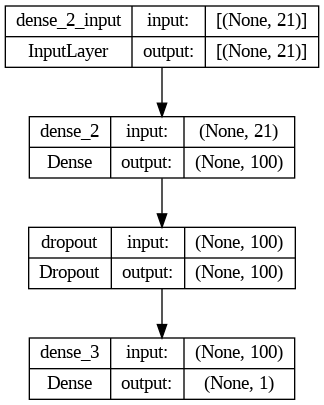

In [8]:
# definisco il model
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

early_stopping_cb = EarlyStopping(monitor="val_loss", patience=4,
                                  start_from_epoch=4,
                                  restore_best_weights=True, verbose=1)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2711/2711 [==============================] - 12s 4ms/step - loss: 0.4739 - accuracy: 0.7935 - val_loss: 0.4347 - val_accuracy: 0.8278
Epoch 2/100
  40/2711 [..............................] - ETA: 10s - loss: 0.4525 - accuracy: 0.8250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2711/2711 [==============================] - 11s 4ms/step - loss: 0.4278 - accuracy: 0.8380 - val_loss: 0.4039 - val_accuracy: 0.8541
Epoch 3/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.4041 - accuracy: 0.8535 - val_loss: 0.3858 - val_accuracy: 0.8607
Epoch 4/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.3942 - accuracy: 0.8589 - val_loss: 0.3814 - val_accuracy: 0.8646
Epoch 5/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3902 - accuracy: 0.8597 - val_loss: 0.3784 - val_accuracy: 0.8652
Epoch 6/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3887 - accuracy: 0.8608 - val_loss: 0.3730 - val_accuracy: 0.8669
Epoch 7/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.3818 - accuracy: 0.8623 - val_loss: 0.3652 - val_accuracy: 0.8672
Epoch 8/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.3797 - accuracy: 0.8619 - val_loss: 0.3629 - val_accurac

In [ ]:
model.evaluate(nn_testset,y_test)

904/904 [==============================] - 2s 2ms/step - loss: 0.3535 - accuracy: 0.8692


[0.35353851318359375, 0.8691727519035339]

loss


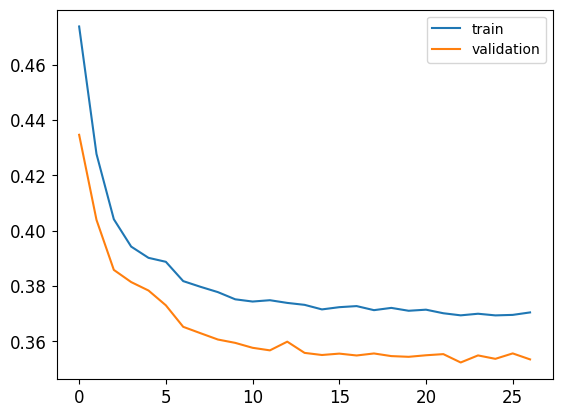

Accuracy


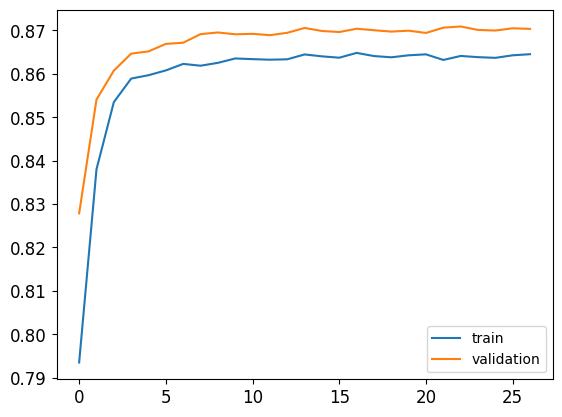

In [ ]:
print("loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.show()
print("Accuracy")
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()
plt.show()

In [ ]:
nn_result = []
for i in range(10,100,10):

    model = keras.models.Sequential([
        keras.layers.Dense(i, activation="relu",input_shape=X_train.shape[1:]),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
    result = model.evaluate(nn_testset, y_test)
    nn_result.append([i,result[0], result[1]])
    print(f"NN con {i} neuroni in un livello nascosto: {result}")

NN_result = pd.DataFrame(data=nn_result, columns=['numero neuroni', 'loss', 'accuracy'])

Epoch 1/100
2711/2711 [==============================] - 13s 4ms/step - loss: 0.5183 - accuracy: 0.7649 - val_loss: 0.4832 - val_accuracy: 0.7787
Epoch 2/100
2711/2711 [==============================] - 12s 4ms/step - loss: 0.4777 - accuracy: 0.7846 - val_loss: 0.4573 - val_accuracy: 0.7955
Epoch 3/100
2711/2711 [==============================] - 12s 4ms/step - loss: 0.4634 - accuracy: 0.8000 - val_loss: 0.4459 - val_accuracy: 0.8113
Epoch 4/100
2711/2711 [==============================] - 12s 4ms/step - loss: 0.4574 - accuracy: 0.8077 - val_loss: 0.4405 - val_accuracy: 0.8176
Epoch 5/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.4557 - accuracy: 0.8113 - val_loss: 0.4383 - val_accuracy: 0.8221
Epoch 6/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.4534 - accuracy: 0.8123 - val_loss: 0.4376 - val_accuracy: 0.8219
Epoch 7/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.4542 - accuracy: 0.8115 - val_loss: 0.4364 -

test senza dropout

In [10]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),

        keras.layers.Dense(1, activation="sigmoid")
    ])

model.compile(optimizer="adam", loss="binary_crossentropy",
                  metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
result = model.evaluate(nn_testset, y_test)

Epoch 1/100
2711/2711 [==============================] - 17s 4ms/step - loss: 0.4798 - accuracy: 0.7890 - val_loss: 0.4482 - val_accuracy: 0.8169
Epoch 2/100
  51/2711 [..............................] - ETA: 8s - loss: 0.4529 - accuracy: 0.8229

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2711/2711 [==============================] - 11s 4ms/step - loss: 0.4259 - accuracy: 0.8399 - val_loss: 0.4140 - val_accuracy: 0.8490
Epoch 3/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.3999 - accuracy: 0.8568 - val_loss: 0.3964 - val_accuracy: 0.8588
Epoch 4/100
2711/2711 [==============================] - 12s 4ms/step - loss: 0.3873 - accuracy: 0.8607 - val_loss: 0.3860 - val_accuracy: 0.8568
Epoch 5/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3760 - accuracy: 0.8640 - val_loss: 0.3729 - val_accuracy: 0.8627
Epoch 6/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3651 - accuracy: 0.8661 - val_loss: 0.3656 - val_accuracy: 0.8653
Epoch 7/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3584 - accuracy: 0.8673 - val_loss: 0.3591 - val_accuracy: 0.8660
Epoch 8/100
2711/2711 [==============================] - 12s 4ms/step - loss: 0.3534 - accuracy: 0.8683 - val_loss: 0.3564 - val_accurac

In [11]:
result

[0.34167590737342834, 0.8691381812095642]

Variazione accuracy e loss al variare del numero di nodi calcolati sul test-set

In [ ]:
import seaborn as sns
num_nodi = [10, 20, 30, 40, 50, 60, 70 ,80 ,90]
accuracy = [0.8554,0.8650,0.8656,0.8676,0.8681,0.8677,0.8688,0.8679,0.8682]
loss= [0.3997,0.3867,0.3849,0.3636,0.3631,0.3678,0.3625,0.3550,0.3532]



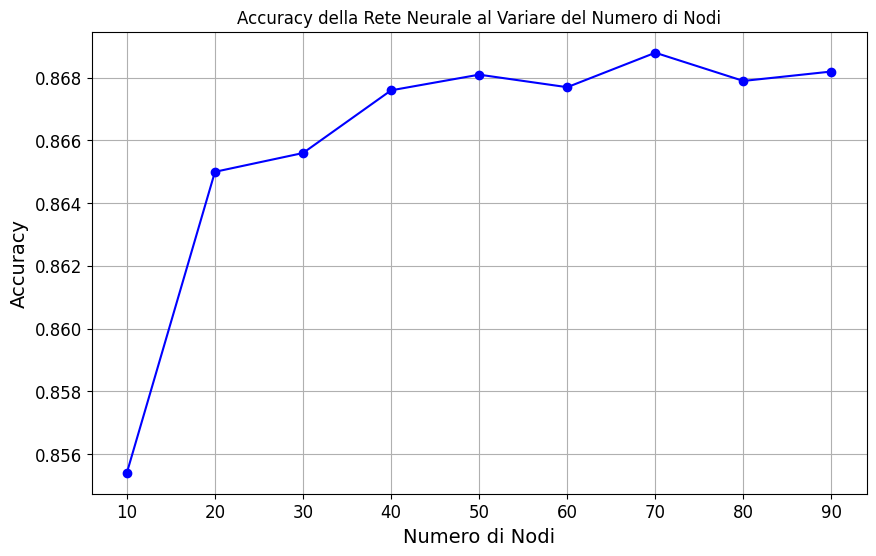

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_nodi, accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy della Rete Neurale al Variare del Numero di Nodi')
plt.xlabel('Numero di Nodi')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(num_nodi)
plt.show()

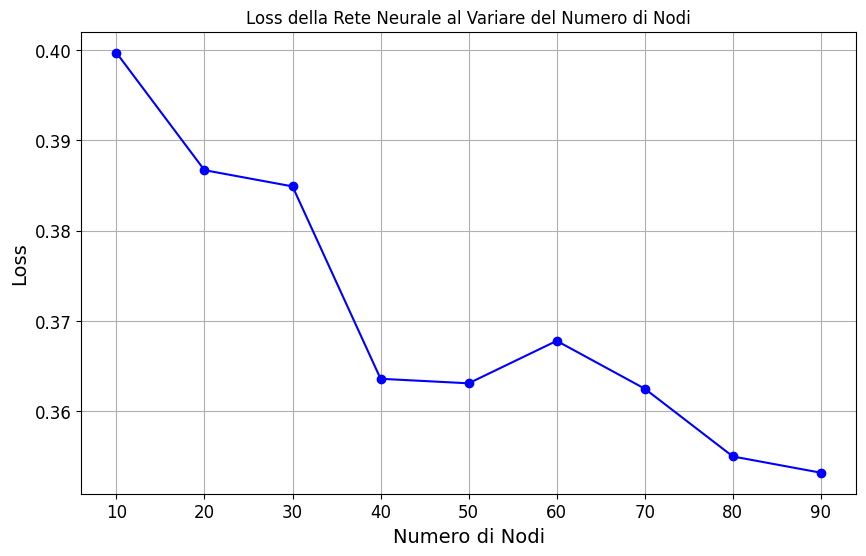

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_nodi, loss, marker='o', linestyle='-', color='b')
plt.title('Loss della Rete Neurale al Variare del Numero di Nodi')
plt.xlabel('Numero di Nodi')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(num_nodi)
plt.show()